In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px
import squarify
from pandas_profiling import ProfileReport
import csv
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from datetime import datetime

In [3]:
df = pd.read_csv('CDNOW_master.txt',sep='\s+',header=None)

In [4]:
df.head(10)

,0,1,2,3
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76
5,3,19970402,2,19.54
6,3,19971115,5,57.45
7,3,19971125,4,20.96
8,3,19980528,1,16.99
9,4,19970101,2,29.33


In [5]:
df.columns = ['CustomerID', 'TransactionDate', 'CDs', 'TotalAmount']

In [6]:
df.tail()

,CustomerID,TransactionDate,CDs,TotalAmount
69654,23568,19970405,4,83.74
69655,23568,19970422,1,14.99
69656,23569,19970325,2,25.74
69657,23570,19970325,3,51.12
69658,23570,19970326,2,42.96


In [7]:
df.shape

(69659, 4)

In [8]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], format='%Y%m%d')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   CustomerID       69659 non-null  int64         
 1   TransactionDate  69659 non-null  datetime64[ns]
 2   CDs              69659 non-null  int64         
 3   TotalAmount      69659 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 2.1 MB


In [10]:
df.describe()

,CustomerID,CDs,TotalAmount
count,69659.000000,69659.000000,69659.000000
mean,11470.854592,2.410040,35.893648
std,6819.904848,2.333924,36.281942
min,1.000000,1.000000,0.000000
25%,5506.000000,1.000000,14.490000
50%,11410.000000,2.000000,25.980000
75%,17273.000000,3.000000,43.700000
max,23570.000000,99.000000,1286.010000


In [11]:
profile = ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
df[df['CustomerID']==22506].head(10)

,CustomerID,TransactionDate,CDs,TotalAmount
66619,22506,1997-03-21,3,44.37
66620,22506,1997-04-20,2,29.16
66621,22506,1997-08-03,1,9.77
66622,22506,1997-11-16,3,44.47
66623,22506,1997-12-22,1,14.99
66624,22506,1997-12-22,1,14.99
66625,22506,1997-12-22,1,14.99
66626,22506,1997-12-22,1,14.99
66627,22506,1997-12-22,1,14.99
66628,22506,1997-12-22,1,14.99


- No null rows
- There are duplicated rows. However, the customers can buy different CDs having the same price.


In [13]:
def analys_univariate(data, col):  # dataframe, tên biến dạng string

    print('\nBasic Statistics', col)
    print('-------------------------------------------------')
    print('The number of unique values of', col, 'is', len(data[col].unique()), '\t',
              data[col].unique() if len(data[col].unique()) < 100 else '')
    print("Max = ", data[col].max(), "\tMin = ", data[col].min())
    print("Range = ", data[col].max() - data[col].min())
    print("Mean = ", data[col].mean())
    print("Median = ", np.median(data[col]))
    print("Mode = ", data[col].mode().values)
    print('--------------------------')
    print("Variance = ", round(np.var(data[col]), 3))
    print("Std = ", round(np.std(data[col]), 3))
    print('--------------------------')
    ##########################################
    Q1 = np.quantile(data[col].dropna(), 0.25)
    Q3 = np.quantile(data[col].dropna(), 0.75)
    IQR = Q3 - Q1
    print('Q1 (First quartile):', Q1, '\nQ3 (Third quartile):', Q3)
    print('IQR:', IQR)
    n_O_upper = data[data[col] > (Q3 + 1.5 * IQR)].shape[0]
    n_O_lower = data[data[col] < (Q1 - 1.5 * IQR)].shape[0]
    print('The number of Lower Outliers:', n_O_lower)
    print('The number of Upper Outliers:', n_O_upper)
    print('The percentage of outliers is', round((n_O_lower + n_O_upper) / data.shape[0] * 100, 3), '%')
    print('--------------------------')
    ##########################################
    skew = data[col].skew()
    if skew > 0:
        print('Right-skewed distribution with skewness =', skew)
    elif skew < 0:
        print('Left-skewed distribution with skewness =', skew)
    else:
        print('Skew-normal distribution with skewness =', skew)
    kurt = data[col].kurtosis()
    if kurt > 0:
        print('Leptokurtic distribution with kurtosis =', kurt)
    elif kurt < 0:
        print('Platykurtic distribution with kurtosis =', kurt)
    else:
        print('Mesokurtic distribution (approximately Normal distribution) with kurtosis =', kurt)
        ##########################################
    print('--------------------------')
    print('Visualization with graphs')
    f = plt.figure(figsize=(8, 6), tight_layout=True)
    plt.subplot(211)
    plt.title('Distplot of ' + str(col))
    sns.distplot(data[col])
    plt.subplot(212)
    plt.title('Boxplot of ' + str(col))
    sns.boxplot(x=data[col])
    plt.show()


Basic Statistics CDs
-------------------------------------------------
The number of unique values of CDs is 45 	 [ 1  5  2  4  3  7  9 10 27 19  6  8 11 15 14 12 30 18 13 21 16 22 26 40
 41 17 20 24 39 32 25 38 23 47 36 34 56 99 28 29 37 43 42 63 70]
Max =  99 	Min =  1
Range =  98
Mean =  2.41004033936749
Median =  2.0
Mode =  [1]
--------------------------
Variance =  5.447
Std =  2.334
--------------------------
Q1 (First quartile): 1.0 
Q3 (Third quartile): 3.0
IQR: 2.0
The number of Lower Outliers: 0
The number of Upper Outliers: 3257
The percentage of outliers is 4.676 %
--------------------------
Right-skewed distribution with skewness = 5.8555431927301544
Leptokurtic distribution with kurtosis = 98.25296140578847
--------------------------
Visualization with graphs


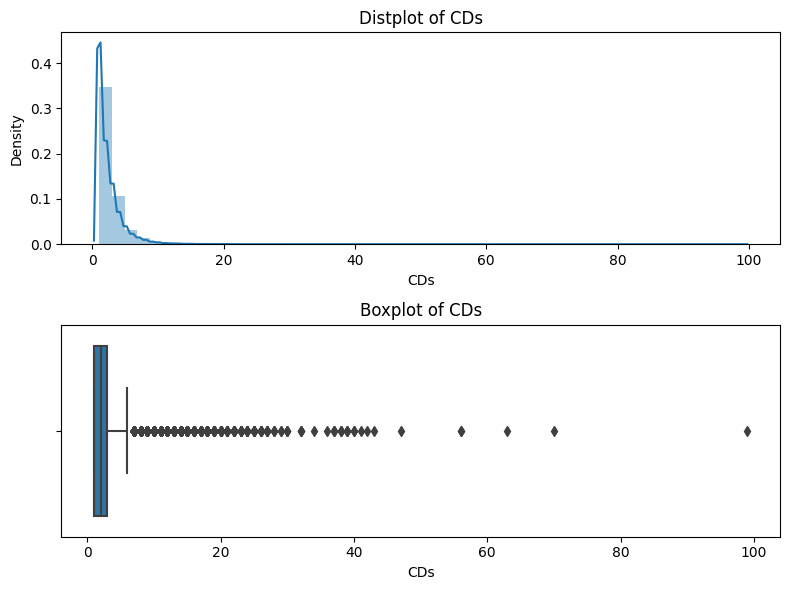


Basic Statistics TotalAmount
-------------------------------------------------
The number of unique values of TotalAmount is 8209 	 
Max =  1286.01 	Min =  0.0
Range =  1286.01
Mean =  35.89364805696321
Median =  25.98
Mode =  [11.77]
--------------------------
Variance =  1316.36
Std =  36.282
--------------------------
Q1 (First quartile): 14.49 
Q3 (Third quartile): 43.7
IQR: 29.21
The number of Lower Outliers: 0
The number of Upper Outliers: 4439
The percentage of outliers is 6.372 %
--------------------------
Right-skewed distribution with skewness = 5.655507653520829
Leptokurtic distribution with kurtosis = 83.89680042931627
--------------------------
Visualization with graphs


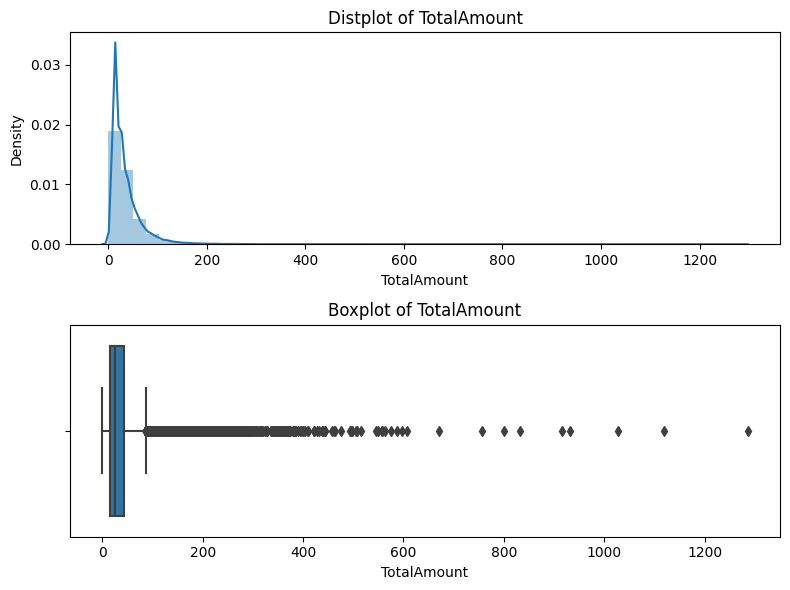

In [14]:
for col in ['CDs', 'TotalAmount']:
    analys_univariate(df, col)

- There are many outliers

In [15]:
TotalAmountByMonth = df.groupby(df['TransactionDate'].dt.to_period('M')).agg({'TotalAmount': 'sum'}).reset_index()
TotalAmountByMonth['TransactionDate'] = TotalAmountByMonth['TransactionDate'].dt.to_timestamp()

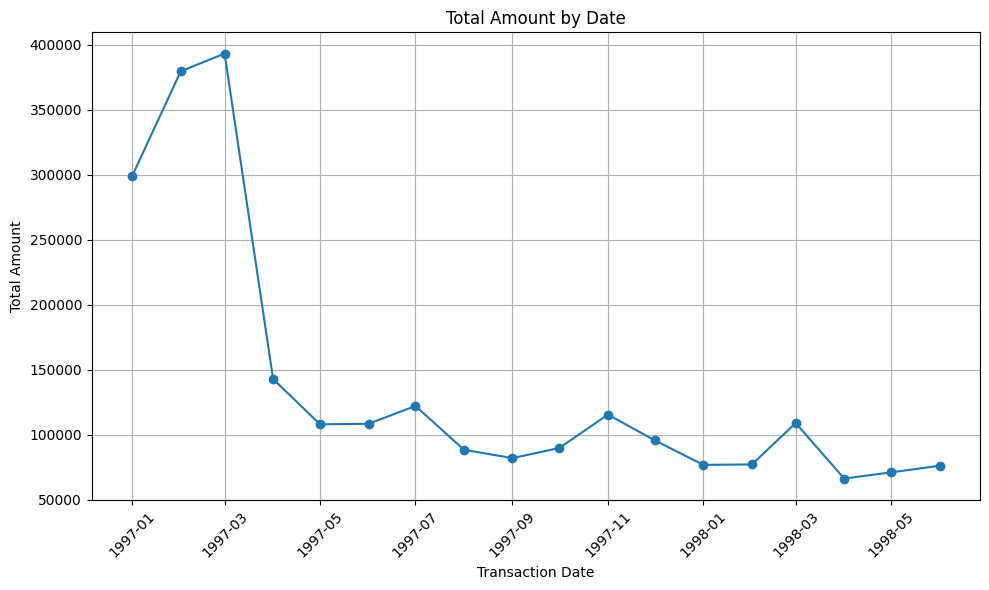

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(TotalAmountByMonth['TransactionDate'], TotalAmountByMonth['TotalAmount'], marker='o')
plt.xlabel('Transaction Date')
plt.ylabel('Total Amount')
plt.title('Total Amount by Date')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

- From March 1997 sales of CDs had dramatically decreased, and by Jun 1998 the sales had decreased by more than 4 times compared to 1997.

In [17]:
df_by_year = df.groupby(df['TransactionDate'].dt.year)['TotalAmount'].sum().reset_index()
df_by_year

,TransactionDate,TotalAmount
0,1997,2024161.26
1,1998,476154.37


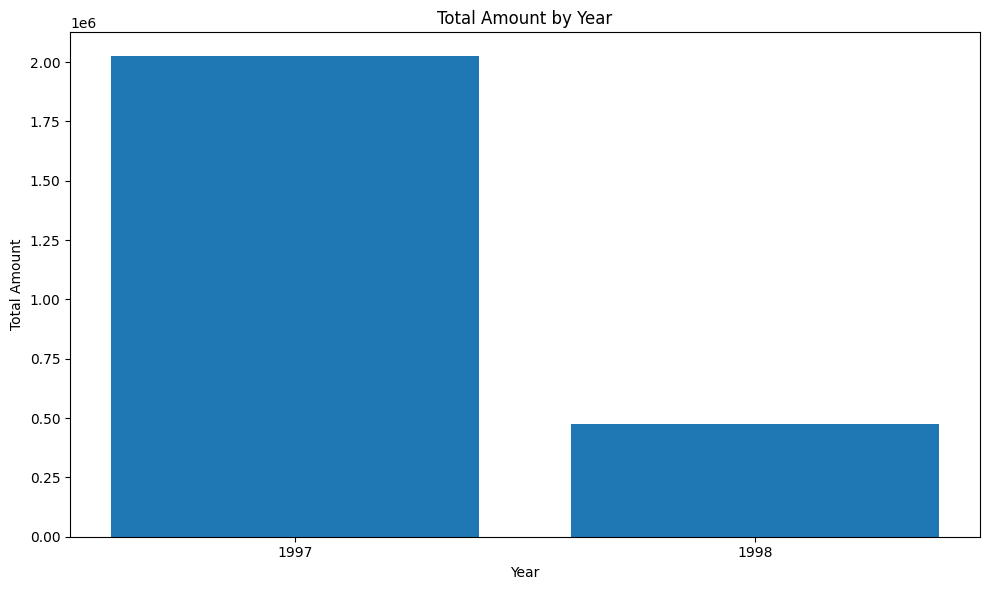

In [18]:
# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(df_by_year['TransactionDate'], df_by_year['TotalAmount'])
plt.xlabel('Year')
plt.ylabel('Total Amount')
plt.title('Total Amount by Year')
plt.xticks(df_by_year['TransactionDate'], df_by_year['TransactionDate'].astype(str))
plt.tight_layout()

# Show the plot
plt.show()


- From the graph, it is evident that sales in 1997 were more than 4 times higher than those in 1998.

In [19]:
# Let’s take a closer look at the data we will need to manipulate.
print('Transactions timeframe from {} to {}'.format(df['TransactionDate'].min(), df['TransactionDate'].max()))
print('{:,} transactions don\'t have a customer id'.format(df[df.CustomerID.isnull()].shape[0]))
print('{:,} unique customer_id'.format(len(df.CustomerID.unique())))

Transactions timeframe from 1997-01-01 00:00:00 to 1998-06-30 00:00:00
0 transactions don't have a customer id
23,570 unique customer_id


## Modeling & Evaluation/ Analyze

### RFM

In [20]:
df['TransactionDate2'] = df['TransactionDate']

In [21]:
df.sample(5)

,CustomerID,TransactionDate,CDs,TotalAmount,TransactionDate2
38248,12548,1997-12-06,1,44.99,1997-12-06
12722,3983,1997-01-16,1,11.97,1997-01-16
18391,5847,1998-06-05,3,49.56,1998-06-05
47131,15480,1998-05-15,1,14.99,1998-05-15
4094,1282,1997-01-06,1,283.97,1997-01-06


In [22]:
# RFM
# Convert string to date, get max date of dataframe
max_date = df['TransactionDate'].max().date()

Recency = lambda x : (max_date - x.max().date()).days
Frequency  = lambda x: len(x.unique())
Monetary = lambda x : round(sum(x), 2)

df_RFM = df.groupby('CustomerID').agg({'TransactionDate': Recency,
                                        'TransactionDate2': Frequency,
                                        'TotalAmount': Monetary })

In [23]:
df_RFM.head()

,TransactionDate,TransactionDate2,TotalAmount
CustomerID,,,
1,545,1,11.77
2,534,1,89.00
3,33,6,156.46
4,200,4,100.50
5,178,11,385.61


In [24]:
# Rename the columns of Dataframe
df_RFM.columns = ['Recency', 'Frequency', 'Monetary']
# Descending Sorting
df_RFM = df_RFM.sort_values('Monetary', ascending=False)

In [25]:
df_RFM.head()

,Recency,Frequency,Monetary
CustomerID,,,
7592,1,146,13990.93
14048,0,171,8976.33
7983,5,125,6973.07
19339,445,22,6552.70
7931,17,53,6497.18


In [26]:
df_RFM.shape

(23570, 3)

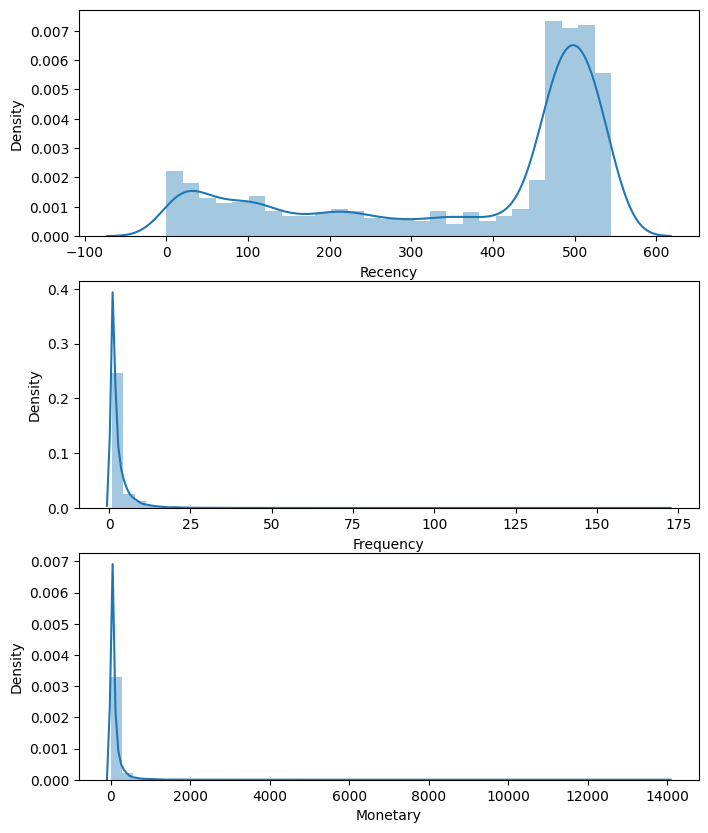

In [27]:
# Virsulization
plt.figure(figsize=(8,10))
plt.subplot(3, 1, 1)
sns.distplot(df_RFM['Recency'])# Plot distribution of R
plt.subplot(3, 1, 2)
sns.distplot(df_RFM['Frequency'])# Plot distribution of F
plt.subplot(3, 1, 3)
sns.distplot(df_RFM['Monetary']) # Plot distribution of M
plt.show()

- From the chart above, it's evident that Recency is skewed to the left, while Frequency and Monetary are skewed to the right.

In [28]:
# Create labels for Recency, Frequency, Monetary
r_labels = range(4, 0, -1)
f_labels = range(1, 5)
m_labels = range(1, 5)

In [29]:
[*r_labels]

[4, 3, 2, 1]

In [30]:
# Assign these labels to 4 equal percentile groups
r_groups = pd.qcut(df_RFM['Recency'].rank(method='first'), q=4, labels=r_labels)

f_groups = pd.qcut(df_RFM['Frequency'].rank(method='first'), q=4, labels=f_labels)

m_groups = pd.qcut(df_RFM['Monetary'].rank(method='first'), q=4, labels=m_labels)

In [31]:
# Create new columns R, F, M
df_RFM = df_RFM.assign(R = r_groups.values, F = f_groups.values,  M = m_groups.values)
df_RFM.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
7592,1,146,13990.93,4,4,4
14048,0,171,8976.33,4,4,4
7983,5,125,6973.07,4,4,4
19339,445,22,6552.70,3,4,4
7931,17,53,6497.18,4,4,4


In [32]:
def join_rfm(x): return str(int(x['R'])) + str(int(x['F'])) + str(int(x['M']))
df_RFM['RFM_Segment'] = df_RFM.apply(join_rfm, axis=1)

In [33]:
df_RFM.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment
CustomerID,,,,,,,
7592,1,146,13990.93,4,4,4,444
14048,0,171,8976.33,4,4,4,444
7983,5,125,6973.07,4,4,4,444
19339,445,22,6552.70,3,4,4,344
7931,17,53,6497.18,4,4,4,444


In [34]:
rfm_count_unique = df_RFM.groupby('RFM_Segment')['RFM_Segment'].nunique()

In [35]:
print(rfm_count_unique.sum())

44


- Instead of combining columns R, F, and M into 44 groups, try using a different method to create a smaller and more user-friendly number of groups.

In [36]:
# Calculate RFM_Score
df_RFM['RFM_Score'] = df_RFM[['R','F','M']].sum(axis=1)
df_RFM.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
7592,1,146,13990.93,4,4,4,444,12
14048,0,171,8976.33,4,4,4,444,12
7983,5,125,6973.07,4,4,4,444,12
19339,445,22,6552.70,3,4,4,344,11
7931,17,53,6497.18,4,4,4,444,12


In [37]:
df_RFM['RFM_Score'].value_counts()

5     5187
4     4176
12    3390
6     2420
11    2122
10    2096
9     2039
8     1303
7      837
Name: RFM_Score, dtype: int64

In [38]:
df_RFM['R'].value_counts()

4    5893
1    5893
3    5892
2    5892
Name: R, dtype: int64

In [39]:
df_RFM['F'].value_counts()

1    5893
4    5893
2    5892
3    5892
Name: F, dtype: int64

In [40]:
df_RFM['M'].value_counts()

1    5893
4    5893
2    5892
3    5892
Name: M, dtype: int64

In [41]:
def rfm_level(df):
    if (df['RFM_Score'] == 12):
        return 'STARS'
    elif (df['RFM_Score'] >= 10):
        return 'LOYAL CUSTOMER'
    elif (df['M'] >= 3 and df['F'] <= 2 and df['RFM_Score'] > 6):
        return 'BIG SPENDER'
    elif (df['M'] < 3 and df['F'] > 2 and df['RFM_Score'] > 6):
        return 'ACTIVE'
    elif (df['R'] == 4 and df['RFM_Score'] <= 6):
        return 'POTENTIAL CUSTOMER'
    elif (df['R'] < 4 and df['RFM_Score'] <= 6):
        return 'LOST'
    else:
        return 'REGULAR'

In [42]:
# Create a new column RFM_Level
df_RFM['RFM_Level'] = df_RFM.apply(rfm_level, axis=1)

In [43]:
df_RFM.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score,RFM_Level
CustomerID,,,,,,,,,
7592,1,146,13990.93,4,4,4,444,12,STARS
14048,0,171,8976.33,4,4,4,444,12,STARS
7983,5,125,6973.07,4,4,4,444,12,STARS
19339,445,22,6552.70,3,4,4,344,11,LOYAL CUSTOMER
7931,17,53,6497.18,4,4,4,444,12,STARS


In [44]:
# Print every 2000th row
df_RFM[::2000]

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score,RFM_Level
CustomerID,,,,,,,,,
7592,1,146,13990.93,4,4,4,444,12,STARS
9681,20,7,274.13,4,4,4,444,12,STARS
14232,25,3,156.50,4,3,4,434,11,LOYAL CUSTOMER
22510,463,1,104.13,3,1,3,313,7,BIG SPENDER
18291,28,3,74.31,4,3,3,433,10,LOYAL CUSTOMER
21733,454,2,55.86,3,3,3,333,9,REGULAR
15207,337,2,42.46,3,3,2,332,8,ACTIVE
12364,480,2,31.98,2,3,2,232,7,ACTIVE
5637,523,1,26.16,1,1,2,112,4,LOST


In [45]:
df_RFM['RFM_Level'].value_counts()

LOST              11783
LOYAL CUSTOMER     4218
STARS              3390
REGULAR            2097
ACTIVE             1721
BIG SPENDER         361
Name: RFM_Level, dtype: int64

In [46]:
# Calculate average values for each RFM_level, and return a size of each segment
rfm_agg = df_RFM.groupby('RFM_Level').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'sum', 'count']}).round(0)

rfm_agg.columns = rfm_agg.columns.droplevel()
rfm_agg.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'MonetarySum', 'Count']
rfm_agg['Percent'] = round((rfm_agg['Count']/rfm_agg.Count.sum())*100, 2)

# Reset the index
rfm_agg = rfm_agg.reset_index()

In [47]:
rfm_agg

,RFM_Level,RecencyMean,FrequencyMean,MonetaryMean,MonetarySum,Count,Percent
0,ACTIVE,328.0,2.0,31.0,53929.0,1721,7.30
1,BIG SPENDER,474.0,1.0,108.0,39017.0,361,1.53
2,LOST,503.0,1.0,28.0,332430.0,11783,49.99
3,LOYAL CUSTOMER,213.0,4.0,141.0,595493.0,4218,17.90
4,REGULAR,408.0,2.0,79.0,165565.0,2097,8.90
5,STARS,70.0,9.0,388.0,1313881.0,3390,14.38


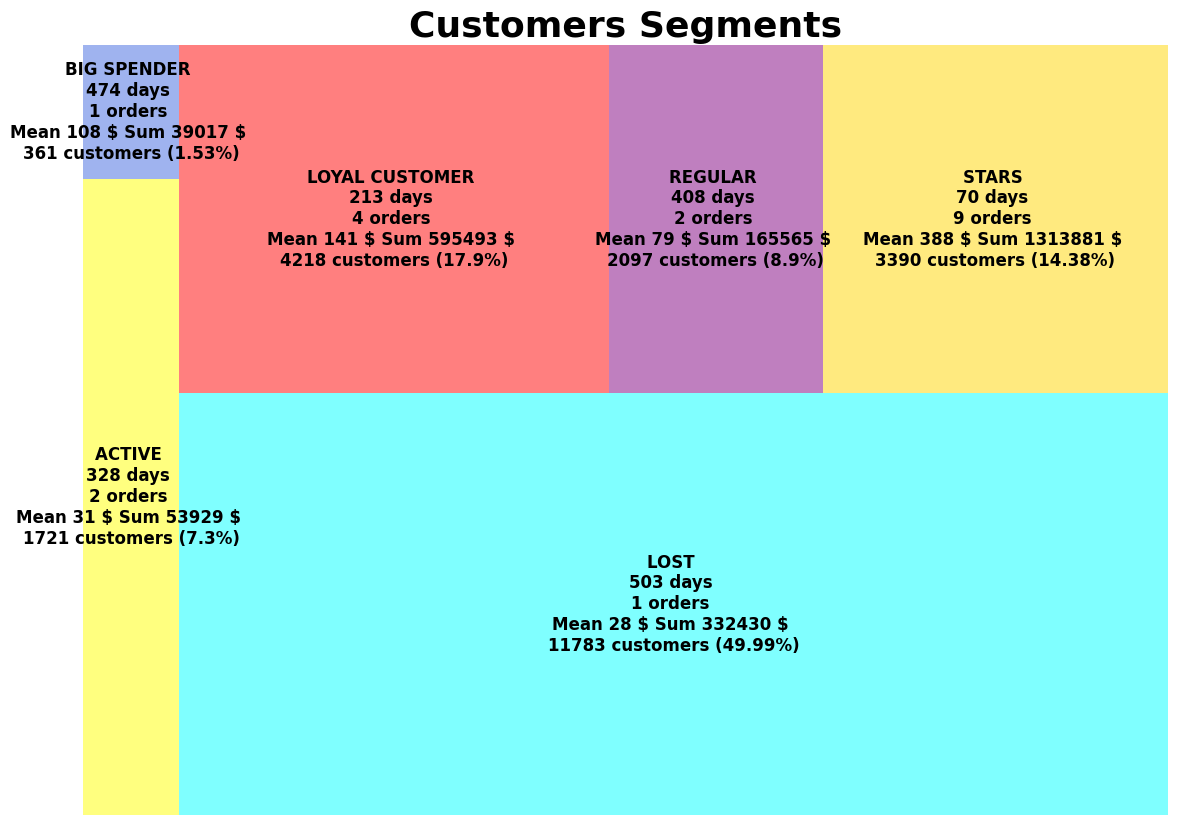

In [48]:
# Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(14, 10)

colors_dict = {'ACTIVE':'yellow','BIG SPENDER':'royalblue', 'REGULAR':'cyan',
               'LOST':'red', 'LOYAL CUSTOMER':'purple', 'STARS':'gold'}

squarify.plot(sizes=rfm_agg['Count'],
              text_kwargs={'fontsize':12,'weight':'bold', 'fontname':"sans serif"},
              color=colors_dict.values(),
              label=['{} \n{:.0f} days \n{:.0f} orders \nMean {:.0f} \$ Sum {:.0f} \$ \n{:.0f} customers ({}%)'.format(*rfm_agg.iloc[i])
                      for i in range(0, len(rfm_agg))], alpha=0.5 )


plt.title("Customers Segments",fontsize=26,fontweight="bold")
plt.axis('off')

# plt.savefig('RFM Segments.png')
plt.show()

- The Lost group comprises the largest segment, with 11,783 customers, while the Big Spender group represents the smallest segment, consisting of just 361 customers.

<AxesSubplot: xlabel='Recency', ylabel='Monetary'>

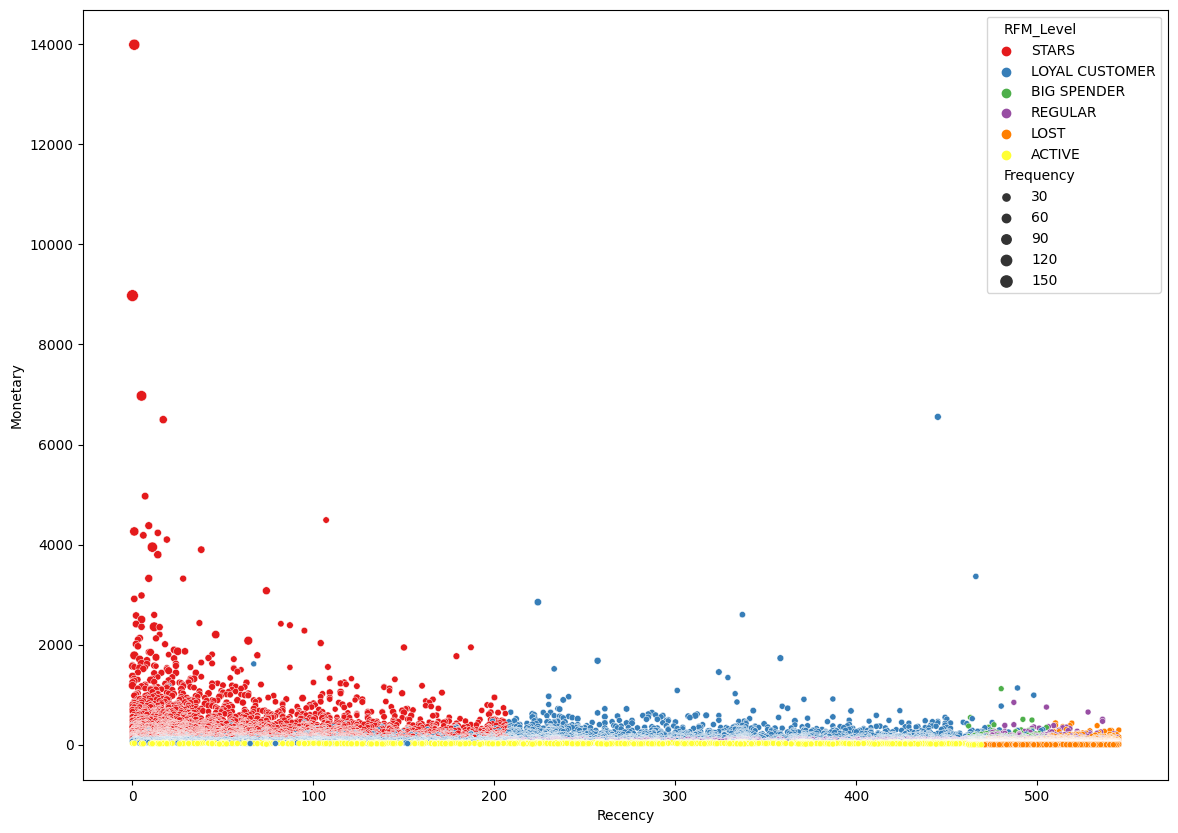

In [49]:
plt.figure(figsize=(14, 10))
sns.scatterplot(data=df_RFM, x='Recency', y='Monetary', size="Frequency", hue='RFM_Level', palette='Set1')

- There's a significant overlap between the Big Spender, Regular, and Lost groups.

In [50]:
import plotly.express as px

fig = px.scatter(rfm_agg, x="RecencyMean", y="MonetaryMean", size="FrequencyMean", color="RFM_Level",
           hover_name="RFM_Level", size_max=100)
fig.show()

- There is a noticeable and distinct separation in Monetary Mean and Recency Mean between the groups.

In [51]:
import plotly.express as px

fig = px.scatter_3d(df_RFM, x='Recency', y='Frequency', z='Monetary',
                    color = 'RFM_Level', opacity=0.5,
                    color_discrete_map = colors_dict)
fig.update_traces(marker=dict(size=5),

                  selector=dict(mode='markers'))
fig.show()

### This dataset is categorized into six distinct customer groups:
- Stars Group: These customers are top performers, regularly making high-value purchases and recently engaging with the company. They are vital for the company's revenue and require special care to retain their loyalty.
- Loyal Customer Group: Just behind the Stars Group in terms of revenue generation, these customers are important. To turn them into Stars, it's crucial to understand their needs and improve service quality.
- Active Group: This group frequently makes purchases, but their order values are relatively small. Encourage them to buy more through promotions and purchase combos.
- Big Spender Group: These customers place large orders, but they do so infrequently. Increase their purchasing frequency with promotional vouchers and loyalty programs.
- The remaining are Regular group and Lost group

### RFM + Kmeans

In [52]:
from feature_engine.wrappers import SklearnTransformerWrapper
from sklearn.preprocessing import RobustScaler

In [53]:
df_now = df_RFM[['Recency','Frequency','Monetary']]
df_now

,Recency,Frequency,Monetary
CustomerID,,,
7592,1,146,13990.93
14048,0,171,8976.33
7983,5,125,6973.07
19339,445,22,6552.70
7931,17,53,6497.18
...,...,...,...
22848,465,1,0.00
15258,491,1,0.00
1381,540,1,0.00


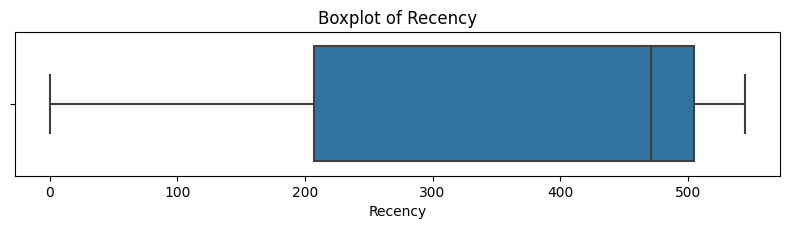

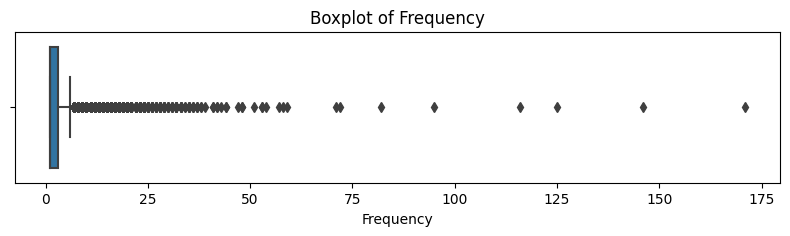

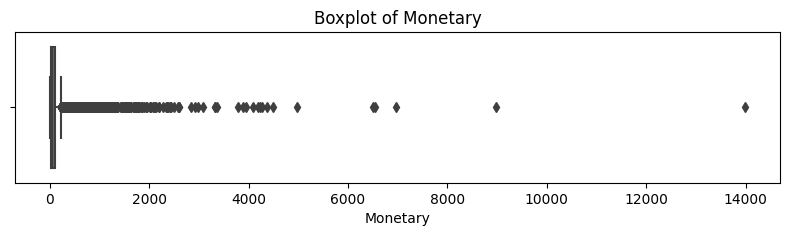

In [54]:
i=1
for col in ['Recency','Frequency','Monetary']:
    plt.figure(figsize=(8, 6), tight_layout=True)
    plt.subplot(3, 1, i)
    plt.title('Boxplot of ' + str(col))
    sns.boxplot(x=df_now[col])
    plt.show()
    i += 1

Because Frequency and Monetary have outliers, we have opted to use RobustScaler for data preprocessing.

In [55]:
scaler = SklearnTransformerWrapper(transformer=RobustScaler())
scaler.fit(df_now, ['Recency','Frequency', 'Monetary'])

SklearnTransformerWrapper(transformer=RobustScaler())

In [56]:
data = scaler.transform(df_now)

In [57]:
data.sample(5)

,Recency,Frequency,Monetary
CustomerID,,,
19609,-0.023490,0.5,1.302641
5789,0.174497,0.0,-0.363274
23040,-1.379195,2.5,3.030750
17662,-1.013423,1.5,2.752962
15331,-0.818792,2.5,0.785677


In [58]:
from sklearn.cluster import KMeans
sse = {}
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=300, n_init=10)
    kmeans.fit(data)
    sse[k] = kmeans.inertia_ # SSE to closest cluster centroid

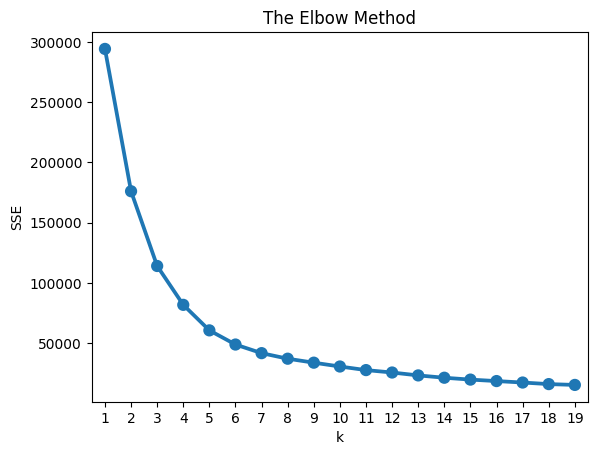

In [59]:
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [60]:
# Build model with k=6
model = KMeans(n_clusters=6, random_state=42, max_iter=300, n_init=10)
model.fit(data)
model.labels_.shape

(23570,)

In [61]:
df_now["Cluster"] = model.labels_
df_now.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'Monetary':['mean', 'sum', 'count']}).round(2)

Recency Frequency Monetary                  
           mean      mean     mean        sum  count
Cluster                                             
0        167.48      4.46   156.21  820738.29   5254
1        459.53      1.33    36.70  609691.19  16615
2          2.00    147.33  9980.11   29940.33      3
3         52.55     20.08  1158.02  327718.83    283
4         57.55     44.69  3444.34   99885.83     29
5         89.39     10.52   441.80  612341.16   1386

In [62]:
# Calculate average values for each RFM_Level, and return a size of each segment
rfm_agg2 = df_now.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'sum', 'count']}).round(0)

rfm_agg2.columns = rfm_agg2.columns.droplevel()
rfm_agg2.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'MonetarySum', 'Count']
rfm_agg2['Percent'] = round((rfm_agg2['Count']/rfm_agg2.Count.sum())*100, 2)

# Reset the index
rfm_agg2 = rfm_agg2.reset_index()

# Change thr Cluster Columns Datatype into discrete values
rfm_agg2['Cluster'] = 'Cluster '+ rfm_agg2['Cluster'].astype('str')

# Print the aggregated dataset
rfm_agg2

,Cluster,RecencyMean,FrequencyMean,MonetaryMean,MonetarySum,Count,Percent
0,Cluster 0,167.0,4.0,156.0,820738.0,5254,22.29
1,Cluster 1,460.0,1.0,37.0,609691.0,16615,70.49
2,Cluster 2,2.0,147.0,9980.0,29940.0,3,0.01
3,Cluster 3,53.0,20.0,1158.0,327719.0,283,1.20
4,Cluster 4,58.0,45.0,3444.0,99886.0,29,0.12
5,Cluster 5,89.0,11.0,442.0,612341.0,1386,5.88


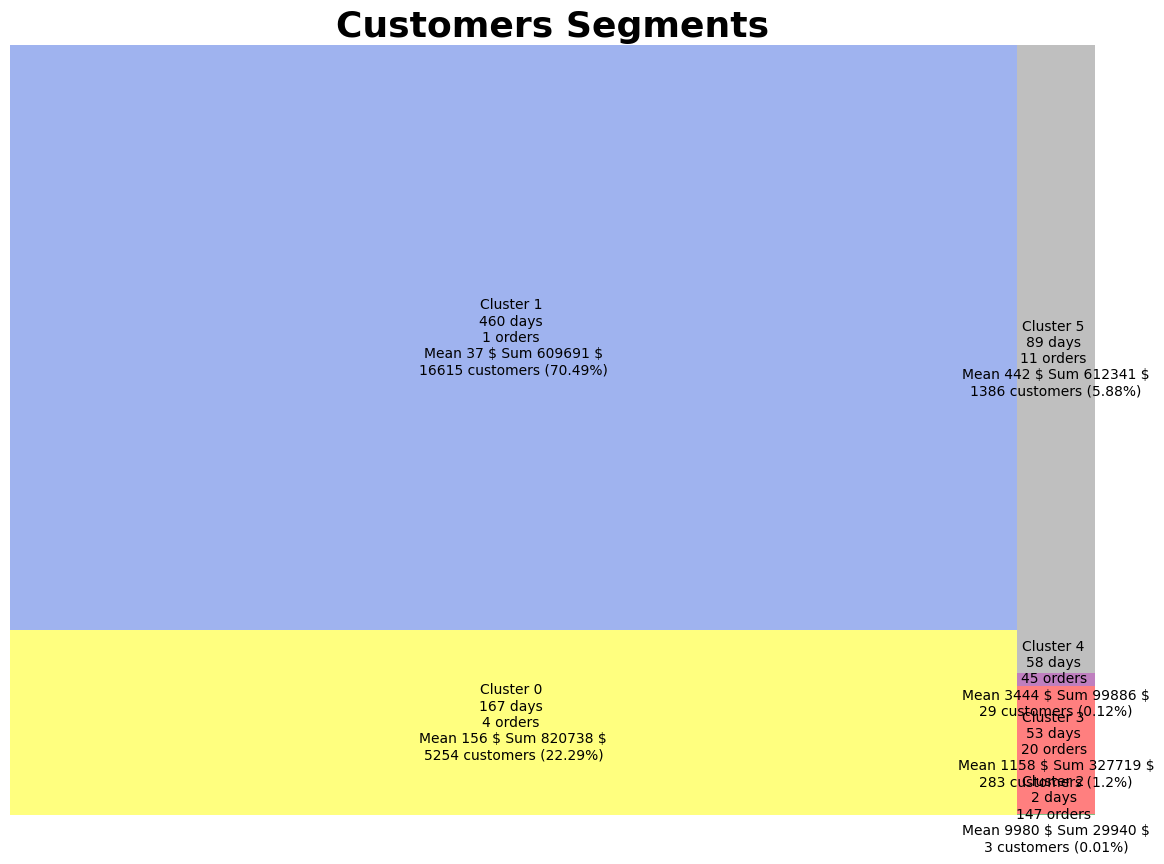

In [63]:
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(14, 10)

colors_dict2 = {'Cluster0':'yellow','Cluster1':'royalblue', 'Cluster2':'green',
               'Cluster3':'red', 'Cluster4':'purple', 'Cluster5':'gray'}

squarify.plot(sizes=rfm_agg2['Count'],
              text_kwargs={'fontsize':10, 'fontname':"sans serif"},
              color=colors_dict2.values(),
              label=['{} \n{:.0f} days \n{:.0f} orders \nMean {:.0f} \$ Sum {:.0f} \$\n{:.0f} customers ({}%)'.format(*rfm_agg2.iloc[i])
                      for i in range(0, len(rfm_agg2))], alpha=0.5 )


plt.title("Customers Segments",fontsize=26,fontweight="bold")
plt.axis('off')

# plt.savefig('Unsupervised Segments.png')
plt.show()

- The number of customers between groups has a large difference

<AxesSubplot: xlabel='Recency', ylabel='Monetary'>

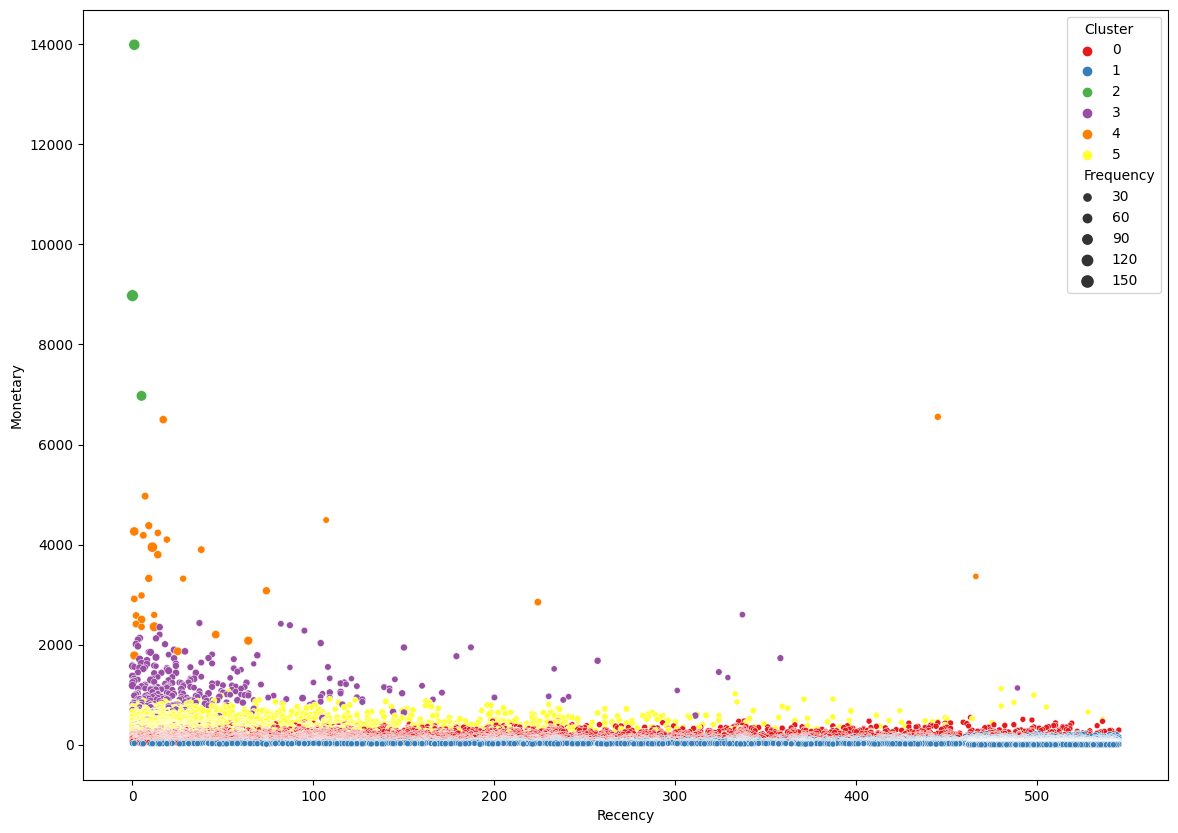

In [64]:
plt.figure(figsize=(14, 10))
sns.scatterplot(data=df_now, x='Recency', y='Monetary', size="Frequency", hue='Cluster', palette='Set1')

- Except for cluster 2, which has only 3 customers, the remaining clusters overlap with each other.

In [65]:
import plotly.express as px

fig = px.scatter_3d(rfm_agg2, x='RecencyMean', y='FrequencyMean', z='MonetaryMean',
                    color = 'Cluster', opacity=0.3)
fig.update_traces(marker=dict(size=20),

                  selector=dict(mode='markers'))
fig.show()

In [66]:
import plotly.express as px

fig = px.scatter(rfm_agg2, x="RecencyMean", y="MonetaryMean", size="FrequencyMean", color="Cluster",
           hover_name="Cluster", size_max=100)
fig.show()

### Using KMeans divide the dataset into 6 groups
- After visualizing the data, I realized that this division is not good, because one group is too large, the remaining groups are not half the size of the one group or are too small => Difficult to build strategies, allocate budget and resources for these groups.

### RFM + Hierarchical Clustering

In [67]:
#Calculate the distance between each sample, use ward's method
Z = linkage(data[['Recency','Frequency','Monetary']], 'ward')

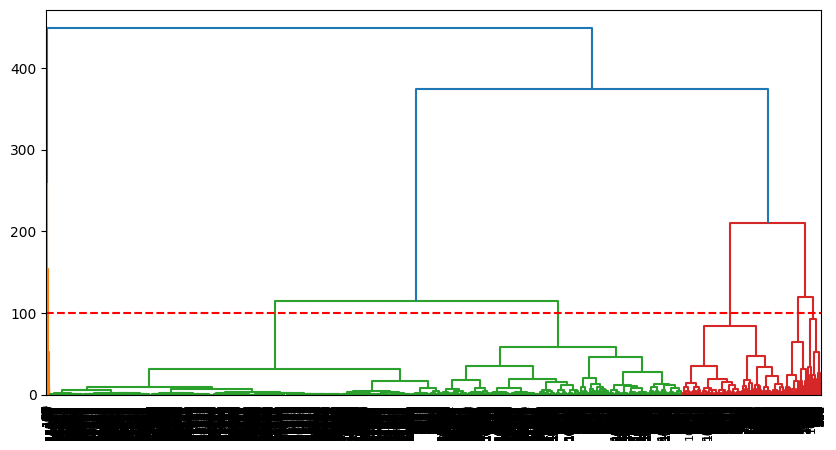

In [68]:
# Visualize the dendrogram
plt.figure(figsize=(10,5))
dendrogram(Z, leaf_rotation=90, leaf_font_size=8)
plt.axhline(y=100,color='r',linestyle='--')
plt.show()

In [69]:
# cluster = 6
hier = AgglomerativeClustering(n_clusters=6, affinity='euclidean',linkage='ward')
hier.fit(data[['Recency','Frequency','Monetary']])

AgglomerativeClustering(affinity='euclidean', n_clusters=6)

In [70]:
df_now['hierCluster'] = hier.labels_

In [71]:
df_now

,Recency,Frequency,Monetary,Cluster,hierCluster
CustomerID,,,,,
7592,1,146,13990.93,2,3
14048,0,171,8976.33,2,3
7983,5,125,6973.07,2,3
19339,445,22,6552.70,4,5
7931,17,53,6497.18,4,5
...,...,...,...,...,...
22848,465,1,0.00,1,2
15258,491,1,0.00,1,2
1381,540,1,0.00,1,2


In [72]:
# Calculate average values for each RFM_Level, and return a size of each segment
rfm_agg3 = df_now.groupby('hierCluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'sum', 'count']}).round(0)

rfm_agg3.columns = rfm_agg3.columns.droplevel()
rfm_agg3.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'MonetarySum', 'Count']
rfm_agg3['Percent'] = round((rfm_agg3['Count']/rfm_agg3.Count.sum())*100, 2)

# Reset the index
rfm_agg3 = rfm_agg3.reset_index()

# Change thr Cluster Columns Datatype into discrete values
rfm_agg3['hierCluster'] = 'hierCluster '+ rfm_agg3['hierCluster'].astype('str')

# Print the aggregated dataset
rfm_agg3

,hierCluster,RecencyMean,FrequencyMean,MonetaryMean,MonetarySum,Count,Percent
0,hierCluster 0,69.0,13.0,552.0,612615.0,1110,4.71
1,hierCluster 1,124.0,6.0,229.0,705354.0,3080,13.07
2,hierCluster 2,425.0,2.0,48.0,930997.0,19275,81.78
3,hierCluster 3,2.0,147.0,9980.0,29940.0,3,0.01
4,hierCluster 4,51.0,28.0,1808.0,157334.0,87,0.37
5,hierCluster 5,52.0,49.0,4272.0,64075.0,15,0.06


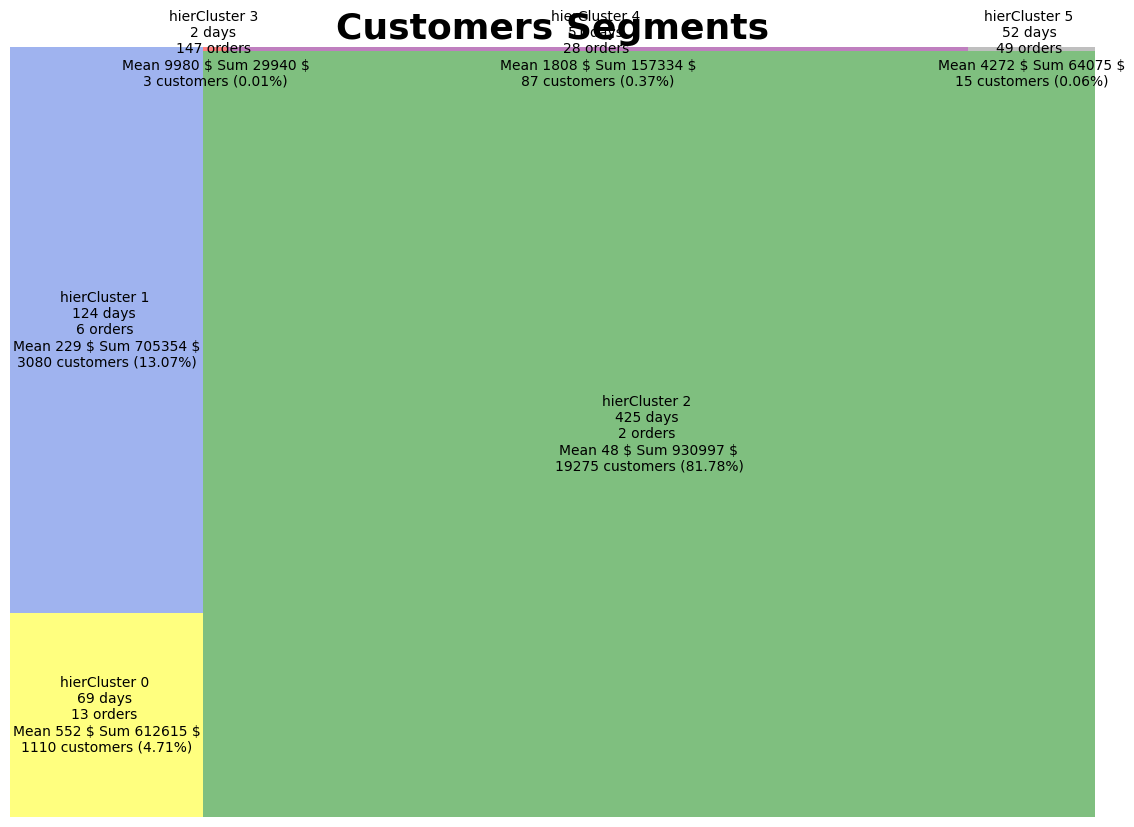

In [73]:
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(14, 10)

colors_dict2 = {'Cluster0':'yellow','Cluster1':'royalblue', 'Cluster2':'green',
               'Cluster3':'red', 'Cluster4':'purple', 'Cluster5':'gray'}

squarify.plot(sizes=rfm_agg3['Count'],
              text_kwargs={'fontsize':10, 'fontname':"sans serif"},
              color=colors_dict2.values(),
              label=['{} \n{:.0f} days \n{:.0f} orders \nMean {:.0f} \$ Sum {:.0f} \$\n{:.0f} customers ({}%)'.format(*rfm_agg3.iloc[i])
                      for i in range(0, len(rfm_agg3))], alpha=0.5 )


plt.title("Customers Segments",fontsize=26,fontweight="bold")
plt.axis('off')

# plt.savefig('Unsupervised Segments.png')
plt.show()

- Similar to the KMeans method above, the numbers of customer groups of the Hierarchical method has still a large difference.

<AxesSubplot: xlabel='Recency', ylabel='Monetary'>

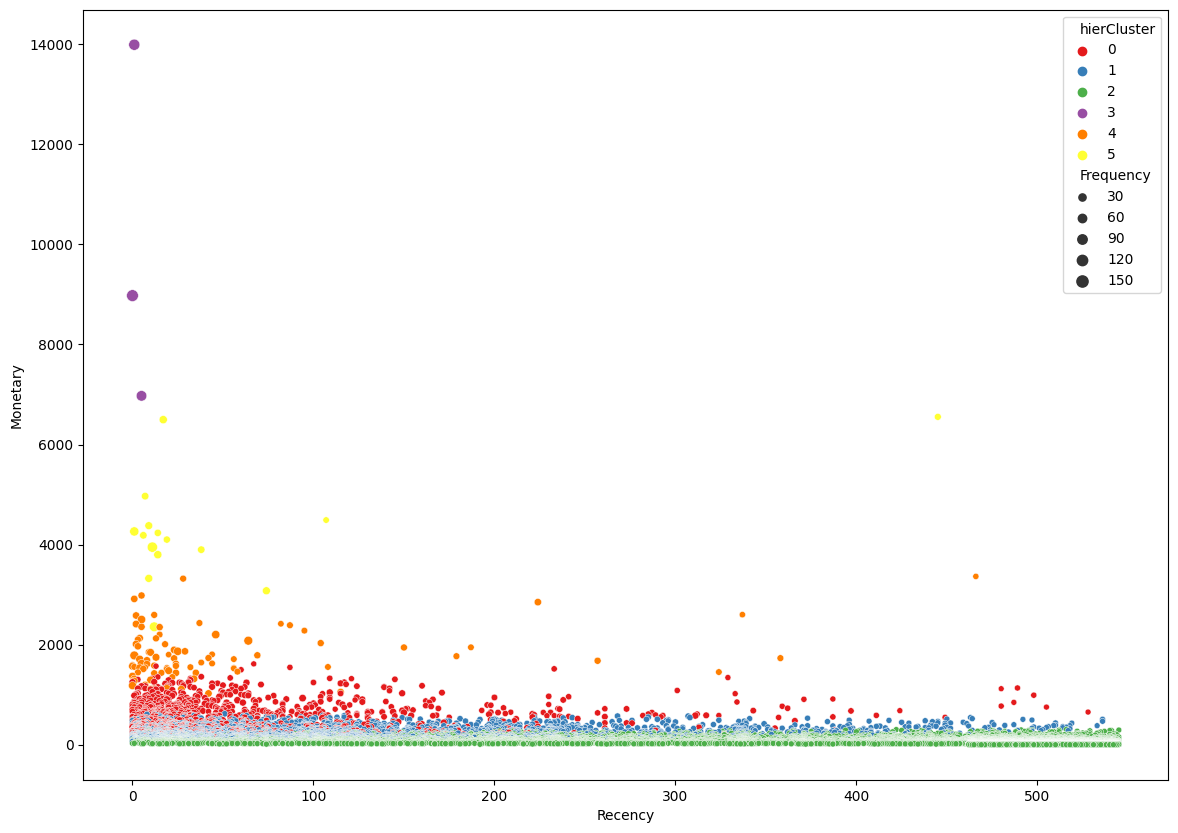

In [74]:
plt.figure(figsize=(14, 10))
sns.scatterplot(data=df_now, x='Recency', y='Monetary', size="Frequency", hue='hierCluster', palette='Set1')

- Cluster 0 and 1 exhibit significant overlap.

In [75]:
import plotly.express as px

fig = px.scatter_3d(rfm_agg3, x='RecencyMean', y='FrequencyMean', z='MonetaryMean',
                    color = 'hierCluster', opacity=0.3)
fig.update_traces(marker=dict(size=20),

                  selector=dict(mode='markers'))
fig.show()

In [76]:
import plotly.express as px

fig = px.scatter(rfm_agg3, x="RecencyMean", y="MonetaryMean", size="FrequencyMean", color="hierCluster",
           hover_name="hierCluster", size_max=100)
fig.show()

### Using Hierarchical divide the dataset into 6 groups
- After visualizing the data, I realize that division was not suitable, similar to KMeans

### RFM + Kmeans (LDS9)

In [77]:
import findspark
findspark.init()

In [78]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.linalg import Vector
from pyspark.ml.feature import StandardScaler, RobustScaler

from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
from pyspark.sql.types import *

In [79]:
spark = SparkSession.builder.appName('customerSegmentation').getOrCreate()

In [80]:
dataframe = df_RFM[['Recency','Frequency','Monetary']]
dataframe = dataframe.reset_index()
dataframe

,CustomerID,Recency,Frequency,Monetary
0,7592,1,146,13990.93
1,14048,0,171,8976.33
2,7983,5,125,6973.07
3,19339,445,22,6552.70
4,7931,17,53,6497.18
...,...,...,...,...
23565,22848,465,1,0.00
23566,15258,491,1,0.00
23567,1381,540,1,0.00
23568,15129,492,1,0.00


In [81]:
dataframe = spark.createDataFrame(dataframe)

In [82]:
dataframe.show()

+----------+-------+---------+--------+
|CustomerID|Recency|Frequency|Monetary|
+----------+-------+---------+--------+
|      7592|      1|      146|13990.93|
|     14048|      0|      171| 8976.33|
|      7983|      5|      125| 6973.07|
|     19339|    445|       22|  6552.7|
|      7931|     17|       53| 6497.18|
|      6569|      7|       36|  4968.0|
|     22279|    107|       13| 4490.64|
|       499|      9|       44| 4378.55|
|      3049|      1|       82| 4262.85|
|     15162|     14|       30| 4234.45|
|     16517|      6|       35|  4185.1|
|      2664|     19|       28| 4100.27|
|     22061|     11|      116|  3948.9|
|     13167|     38|       35|  3898.7|
|     12367|     14|       53| 3798.24|
|     14894|    466|        7| 3363.93|
|      1077|      9|       48| 3324.49|
|     21739|     28|       22| 3319.83|
|     20917|     74|       47| 3077.45|
|     21950|      5|       27|  2982.8|
+----------+-------+---------+--------+
only showing top 20 rows



In [83]:
vec_assembler = VectorAssembler(inputCols=['Recency', 'Frequency', 'Monetary'],
                                outputCol='features')

In [84]:
dataframe = vec_assembler.transform(dataframe)

In [85]:
scaler = RobustScaler(inputCol='features', outputCol='scaledFeatures')

In [86]:
scalerModel = scaler.fit(dataframe)
dataframe = scalerModel.transform(dataframe)

In [87]:
dataframe.show(5,False)

+----------+-------+---------+--------+--------------------+----------------------------------------------+
|CustomerID|Recency|Frequency|Monetary|features            |scaledFeatures                                |
+----------+-------+---------+--------+--------------------+----------------------------------------------+
|7592      |1      |146      |13990.93|[1.0,146.0,13990.93]|[0.003355704697986577,73.0,162.19487595641087]|
|14048     |0      |171      |8976.33 |[0.0,171.0,8976.33] |[0.0,85.5,104.0613262230466]                  |
|7983      |5      |125      |6973.07 |[5.0,125.0,6973.07] |[0.016778523489932886,62.5,80.83781590540228] |
|19339     |445    |22       |6552.7  |[445.0,22.0,6552.7] |[1.4932885906040267,11.0,75.96452585207513]   |
|7931      |17     |53       |6497.18 |[17.0,53.0,6497.18] |[0.05704697986577181,26.5,75.32089033155577]  |
+----------+-------+---------+--------+--------------------+----------------------------------------------+
only showing top 5 rows



In [88]:
# Trains a k-means model
k_list = []
silhouette_list = []
sil_str=''

for k in range(2,20):
    kmeans = KMeans(featuresCol='scaledFeatures', k=k)
    model = kmeans.fit(dataframe)
    k_list.append(k)

    # silhoutte
    predictions = model.transform(dataframe)

    # Evaluate clustering by computing Silhouette score
    evaluator = ClusteringEvaluator()
    silhouette = evaluator.evaluate(predictions)
    silhouette_list.append(silhouette)

    sil_str = sil_str + 'With k=' + str(k) + '- Silhouette =' + str(silhouette) + '\n'

In [89]:
print(sil_str)

With k=2- Silhouette =0.9071502354526828
With k=3- Silhouette =0.8118111092842434
With k=4- Silhouette =0.645361711001302
With k=5- Silhouette =0.6351173494694583
With k=6- Silhouette =0.6505015076485564
With k=7- Silhouette =0.6446745659303907
With k=8- Silhouette =0.6170570353747145
With k=9- Silhouette =0.5074294118565782
With k=10- Silhouette =0.5096094958768121
With k=11- Silhouette =0.5711218222231064
With k=12- Silhouette =0.5742767390081518
With k=13- Silhouette =0.535836573895233
With k=14- Silhouette =0.5432287013867958
With k=15- Silhouette =0.4577458832671794
With k=16- Silhouette =0.4622725813887735
With k=17- Silhouette =0.43660812485049966
With k=18- Silhouette =0.42683207779052107
With k=19- Silhouette =0.4871225774555393



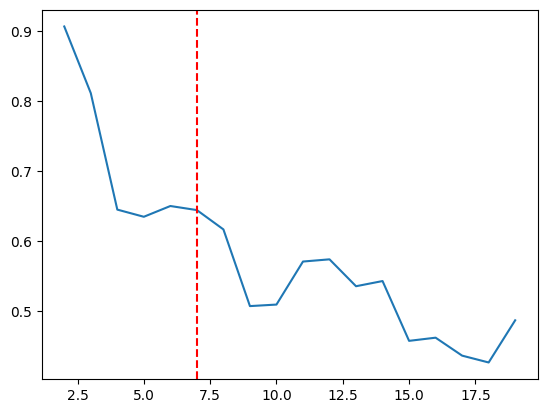

In [90]:
plt.plot(k_list, silhouette_list)
plt.axvline(x=7, color='r', linestyle='--')

In [91]:
# Trains a k-means model
kmeans = KMeans(featuresCol='scaledFeatures', k=7)
model = kmeans.fit(dataframe)

# silhoutte
predictions = model.transform(dataframe)
# Evaluate clustering by computing Silhouette score
evaluator = ClusteringEvaluator()
silhouette = evaluator.evaluate(predictions)
print('Silhoutte = ' + str(silhouette))

Silhoutte = 0.6446745659303907


In [92]:
predictions.show(5)

+----------+-------+---------+--------+--------------------+--------------------+----------+
|CustomerID|Recency|Frequency|Monetary|            features|      scaledFeatures|prediction|
+----------+-------+---------+--------+--------------------+--------------------+----------+
|      7592|      1|      146|13990.93|[1.0,146.0,13990.93]|[0.00335570469798...|         5|
|     14048|      0|      171| 8976.33| [0.0,171.0,8976.33]|[0.0,85.5,104.061...|         5|
|      7983|      5|      125| 6973.07| [5.0,125.0,6973.07]|[0.01677852348993...|         5|
|     19339|    445|       22|  6552.7| [445.0,22.0,6552.7]|[1.49328859060402...|         1|
|      7931|     17|       53| 6497.18| [17.0,53.0,6497.18]|[0.05704697986577...|         1|
+----------+-------+---------+--------+--------------------+--------------------+----------+
only showing top 5 rows



In [93]:
predictions.groupBy('prediction').count().show()

+----------+-----+
|prediction|count|
+----------+-----+
|         1|   16|
|         6|   83|
|         3|  476|
|         5|    3|
|         4|15881|
|         2| 1729|
|         0| 5382|
+----------+-----+



In [94]:
rfm_agg4 = predictions.groupBy('prediction').agg(
    avg('Recency').alias('RecencyMean'),
    avg('Frequency').alias('FrequencyMean'),
    avg('Monetary').alias('MonetaryMean'),
    sum('Monetary').alias('MonetarySum'),
    count('Monetary').alias('Count')
)

rfm_agg4.show()


+----------+------------------+------------------+------------------+------------------+-----+
|prediction|       RecencyMean|     FrequencyMean|      MonetaryMean|       MonetarySum|Count|
+----------+------------------+------------------+------------------+------------------+-----+
|         1|           79.0625|           41.9375| 4275.079999999999| 68401.27999999998|   16|
|         6| 41.28915662650602|30.216867469879517|1789.2500000000005|148507.75000000003|   83|
|         3|63.930672268907564|15.995798319327731| 797.4393067226903|379581.11000000057|  476|
|         5|               2.0|147.33333333333334|           9980.11|          29940.33|    3|
|         4| 470.1253699389207|1.2747308104023676|34.841202695043975| 553313.1399999934|15881|
|         2|106.75997686524002| 8.614806246385193|350.54602082128423| 606094.0700000004| 1729|
|         0|180.16276477146042| 3.942214790040877|132.75324228911197| 714477.9500000007| 5382|
+----------+------------------+------------------+

In [95]:
rfm_agg4 = rfm_agg4.toPandas()

In [96]:
# rfm_agg4['Percent'] = round((rfm_agg4['Count']/rfm_agg4.Count.sum())*100, 2)
rfm_agg4['Percent'] = ((rfm_agg4['Count'] / rfm_agg4['Count'].sum()) * 100).round(2)

# Change the Cluster Columns Datatype into discrete values
rfm_agg4['prediction'] = 'Cluster '+ rfm_agg4['prediction'].astype('str')

# Print the aggregated dataset
rfm_agg4

,prediction,RecencyMean,FrequencyMean,MonetaryMean,MonetarySum,Count,Percent
0,Cluster 1,79.062500,41.937500,4275.080000,68401.28,16,0.07
1,Cluster 6,41.289157,30.216867,1789.250000,148507.75,83,0.35
2,Cluster 3,63.930672,15.995798,797.439307,379581.11,476,2.02
3,Cluster 5,2.000000,147.333333,9980.110000,29940.33,3,0.01
4,Cluster 4,470.125370,1.274731,34.841203,553313.14,15881,67.38
5,Cluster 2,106.759977,8.614806,350.546021,606094.07,1729,7.34
6,Cluster 0,180.162765,3.942215,132.753242,714477.95,5382,22.83


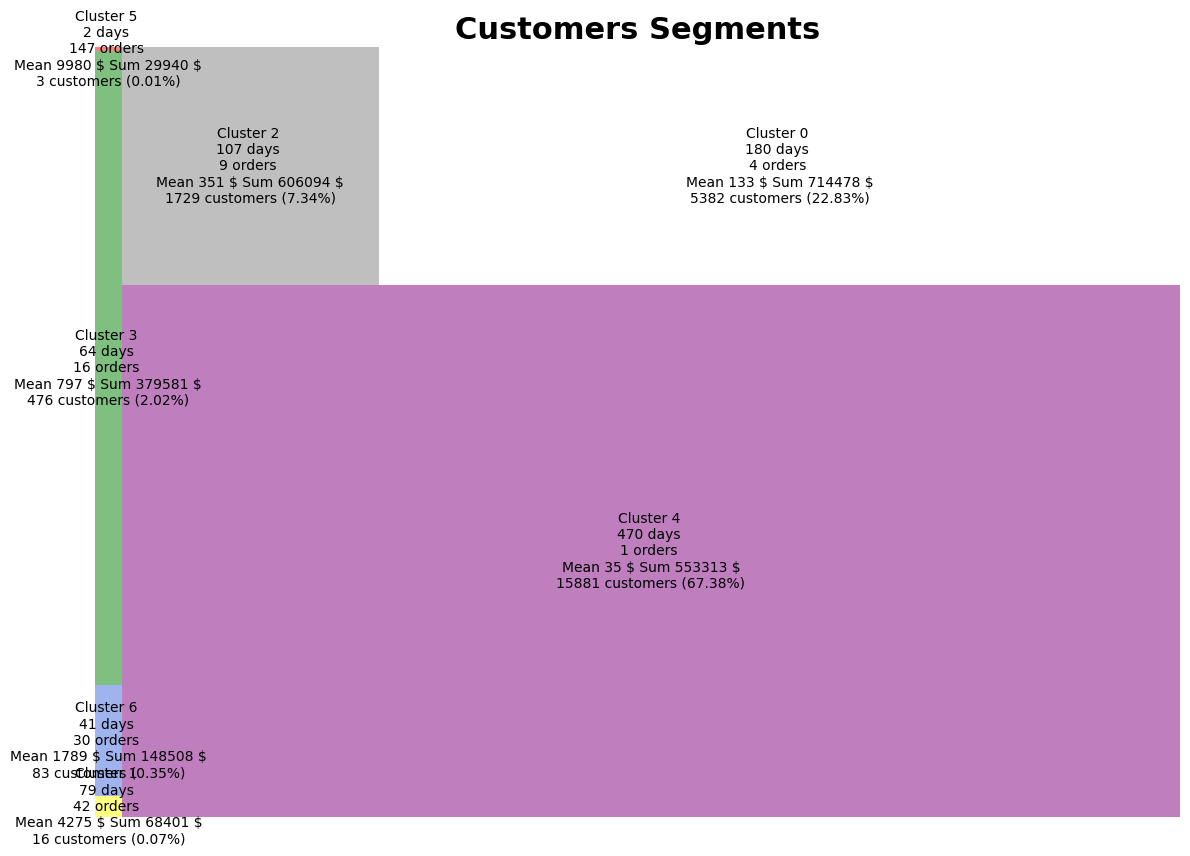

In [97]:
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(14, 10)

colors_dict2 = {'Cluster0':'yellow','Cluster1':'royalblue', 'Cluster2':'green',
               'Cluster3':'red', 'Cluster4':'purple', 'Cluster5':'gray', 'Cluster6':'white'}

squarify.plot(sizes=rfm_agg4['Count'],
              text_kwargs={'fontsize':10, 'fontname':"sans serif"},
              color=colors_dict2.values(),
              label=['{} \n{:.0f} days \n{:.0f} orders \nMean {:.0f} \$ Sum {:.0f} \$\n{:.0f} customers ({}%)'.format(*rfm_agg4.iloc[i])
                      for i in range(0, len(rfm_agg4))], alpha=0.5 )


plt.title("Customers Segments",fontsize=22,fontweight="bold")
plt.axis('off')

# plt.savefig('Unsupervised Segments.png')
plt.show()

- This method divides into 7 groups and the difference in the number of customers in each group still does not improve.

<AxesSubplot: xlabel='Recency', ylabel='Monetary'>

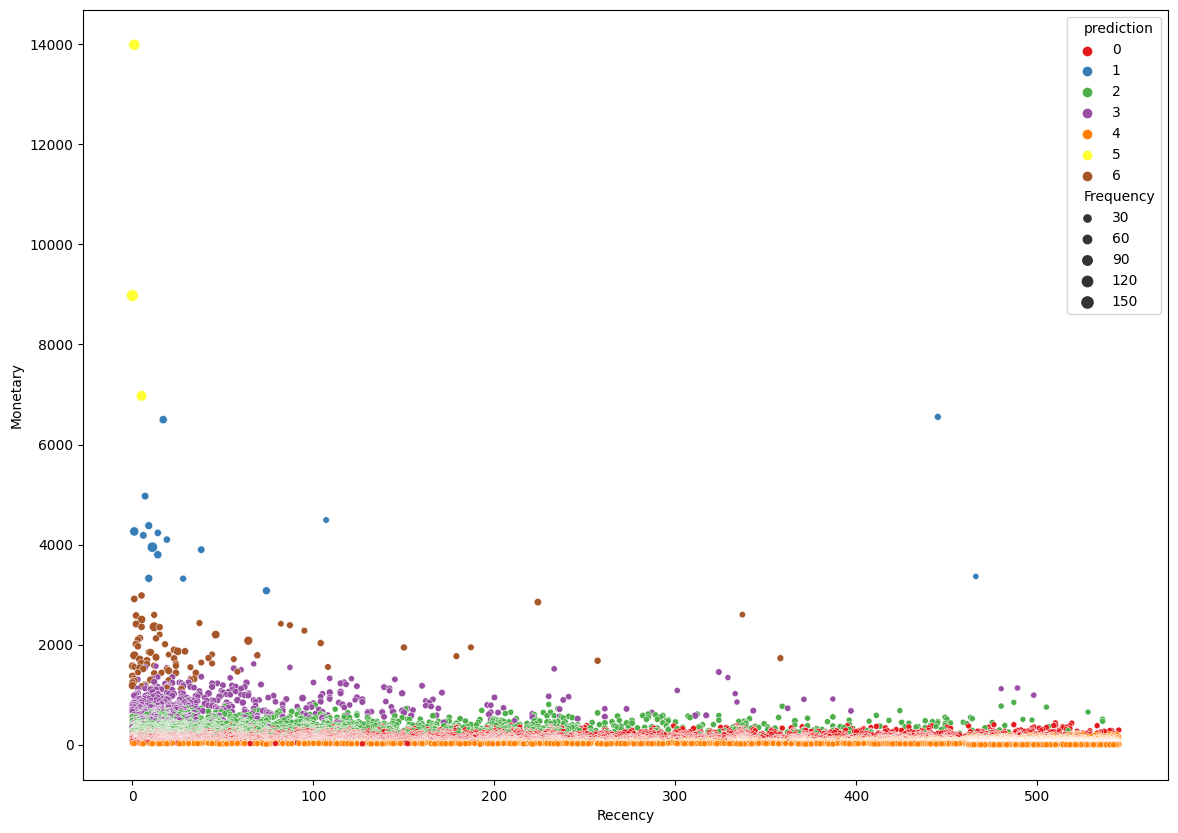

In [98]:
plt.figure(figsize=(14, 10))
sns.scatterplot(data=predictions.toPandas(), x='Recency', y='Monetary', size="Frequency", hue='prediction', palette='Set1')

In [99]:
import plotly.express as px

fig = px.scatter_3d(rfm_agg4, x='RecencyMean', y='FrequencyMean', z='MonetaryMean',
                    color = 'prediction', opacity=0.3)
fig.update_traces(marker=dict(size=20),

                  selector=dict(mode='markers'))
fig.show()

- Both KMeans and Hierarchical methods fail to separate customer groups effectively. When attempting to divide them into 7 groups using Kmeans in Big Data, the results continue to show overlapping customer groups.

In [100]:
import plotly.express as px

fig = px.scatter(rfm_agg4, x="RecencyMean", y="MonetaryMean", size="FrequencyMean", color="prediction",
           hover_name="prediction", size_max=100)
fig.show()

### Conclusion:
#### In analyzing the CDNOW dataset with 23,570 CustomerIDs and 69,659 records, we explored four methods for customer grouping:
- Grouping based on personal experience: This method yielded six clearly defined groups, making it easy to propose specific strategies due to a clear understanding of each group's characteristics.
- KMeans clustering: This approach divided the dataset into six groups, but with significant size disparities (3 vs. 16,615), making it challenging to create practical strategies for each group.
- Hierarchical grouping: Like KMeans, this method resulted in six groups with significant size differences and overlap.
- KMeans clustering in Big Data: Despite dividing the dataset into seven groups, this method did not offer more effective results than KMeans.
#### => It's practical to use the grouping method based on personal experience for real-world applications.